In [1]:
import numpy as np
from astropy.wcs import WCS
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patches as patches
import matplotlib.colors as colors
from matplotlib.offsetbox import AnchoredText
from mpl_toolkits.axes_grid1.anchored_artists import (AnchoredSizeBar)
import matplotlib.font_manager as fm
from scipy.ndimage.filters import gaussian_filter
from reproject.mosaicking import find_optimal_celestial_wcs
from reproject import reproject_interp
import cmasher as cmr
import pandas as pd
from tabulate import tabulate

%matplotlib inline

In [2]:
hst_dir = '/Users/orion/phd_research/CSS2/hst_data/cropped_drc/'

In [3]:
op = get_pkg_data_filename(hst_dir+'1221-423_f689m_new.fits')
hdu_op = fits.open(op)[0]

uv = get_pkg_data_filename(hst_dir+'1221-423_f275w_new.fits')
hdu_uv = fits.open(uv)[0]

In [2]:
columns=['x', 'y', 'kron_mag', 'mag_err', 'kron_radius']
df = pd.read_csv('1221_sextractor.txt', sep='    ', skiprows=[0,1,2,3,4,5,6,7,8], usecols=[0,1,4,5,6],
                 names= columns, header=None)
df 

/Users/orion/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


,x,y,kron_mag,mag_err,kron_radius
0,226.9104,168.1967,22.3722,0.7652,5.98
1,204.9031,278.0411,21.8075,0.5886,5.19
2,200.0313,203.6437,23.1721,1.1066,6.94
3,204.4081,171.6900,23.9820,1.6056,5.62
4,222.4422,170.4791,22.2442,0.7215,7.19
5,225.9001,280.9144,23.2778,1.1619,6.88
6,219.3723,280.7473,23.2498,1.1495,7.64
7,234.2358,278.5652,23.5477,1.3183,6.78
8,285.8165,243.2973,23.8031,1.4834,6.74
9,246.6831,303.7823,22.8737,0.9645,6.71


In [3]:
x_values = df['x'].values.tolist()
y_values = df['y'].values.tolist()
indices = df.index.values.tolist()

In [ ]:
x1221, y1221, xn, yn, text1, text2= [], [], [], [], [], []

for i in range(len(x_values)):
    if i<11:
        text1.append(indices[i])
        x1221.append(x_values[i])
        y1221.append(y_values[i])
    elif i>=11:
        text2.append(indices[i])
        xn.append(x_values[i])
        yn.append(y_values[i])
        

In [7]:
hdu_uv.data = gaussian_filter(hdu_uv.data, 1.0)

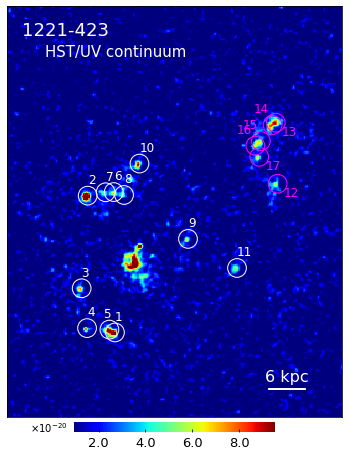

In [43]:
wcs = WCS(hdu_uv.header)
fig = plt.figure(figsize=(6,9))
ax = plt.subplot(projection=wcs)

for axis in fig.get_axes():
    
    axis.tick_params(axis='both', color='k',direction='in', length=0)
    #axis.axis('off')
    lon = axis.coords[0]
    lat = axis.coords[1]
    lon.set_ticklabel_visible(False)
    lat.set_ticklabel_visible(False)

    
factor = 3.18e-18/1e-20
im = ax.imshow(hdu_uv.data*factor, origin='lower', vmin=0.003*factor, vmax=0.03*factor, 
        cmap='jet', interpolation='none', aspect="auto") 

ax.set_xlim(140, 410)
ax.set_ylim(100, 430)
    

for i in range(len(x1221)):
    ax.scatter(x1221[i], y1221[i], s=350, transform=ax.get_transform(wcs),
               linewidth=1.0, edgecolor='white', facecolor='none')
    if i==4:
        ax.annotate(text1[i]+1, (x1221[i] - 5.0, y1221[i] + 10.0), color='white', fontsize=12)
    else:
        ax.annotate(text1[i]+1, (x1221[i], y1221[i] + 10.0), color='white', fontsize=12)

        
for i in range(len(xn)):
    ax.scatter(xn[i], yn[i], s=350, transform=ax.get_transform(wcs),
               linewidth=1.0, edgecolor='magenta', facecolor='none') 
    if i==2 or i==3 or i==4:
        ax.annotate(text2[i]+1, (xn[i] - 15.0, yn[i] + 10.0), color='magenta', fontsize=12)
    else:
        ax.annotate(text2[i]+1, (xn[i] + 5.0, yn[i] - 10.0), color='magenta', fontsize=12)
    
    
fontprops = fm.FontProperties(size=16)
bar = AnchoredSizeBar(transform=ax.transData, size=30, size_vertical=0.4, label='6 kpc',
            loc='lower right', pad=0.1, borderpad=2.0, sep= -20,
            color='white', frameon=False, fontproperties=fontprops)
ax.add_artist(bar)

Afont1 = {'family': 'sans-serif', 'color': 'white','weight': 'normal','size': 18}
at1 = AnchoredText('1221-423',loc='upper left', pad=0.5, borderpad=0.3, prop=Afont1, frameon=False)
ax.add_artist(at1)

Afont2 = {'family': 'sans-serif','color':  'white','weight': 'normal','size': 15}
at2 = AnchoredText('HST/UV continuum',loc='upper left', pad=0.0, borderpad=2.5, prop=Afont2, frameon=False)
ax.add_artist(at2)

cbar = fig.colorbar(im, ax=ax, aspect=20, format= "%.1f", pad=0.01, shrink=0.6, orientation="horizontal") 
cbar.ax.tick_params(direction='in', labelsize=13)
cbar.ax.set_ylabel(r'$\times 10^{-20}$', labelpad=25, y=-0.2, rotation=0)
cbar.outline.set_visible(False)


plt.savefig('1221-423.pdf',facecolor='w', dpi=1000, bbox_inches='tight', pad_inches=0.5)

In [4]:
# pixels to arcsec
df['aperture']= 0.05*df['kron_radius']

In [5]:
df = df.round(2)

In [6]:
df['kron_mag'] = df['kron_mag'].astype(str) + '\pm' + df['mag_err'].astype(str)

In [7]:
Kmag = df['kron_mag'].values.tolist()
Krad = df['aperture'].values.tolist()

In [8]:
apnum =[]
for i in range(len(indices)):
    apnum.append(indices[i]+1)

In [9]:
newdf = pd.DataFrame(list(zip(apnum, Krad, Kmag)), columns =['Region', 'Aperture radius', 'Mag']) 

In [10]:
print(tabulate(newdf, tablefmt="latex_raw", headers="keys", showindex=False, numalign="center", stralign="center"))

\begin{tabular}{ccc}
\hline
  Region  &  Aperture radius  &     Mag      \\
\hline
    1     &        0.3        & 22.37\pm0.77 \\
    2     &       0.26        & 21.81\pm0.59 \\
    3     &       0.35        & 23.17\pm1.11 \\
    4     &       0.28        & 23.98\pm1.61 \\
    5     &       0.36        & 22.24\pm0.72 \\
    6     &       0.34        & 23.28\pm1.16 \\
    7     &       0.38        & 23.25\pm1.15 \\
    8     &       0.34        & 23.55\pm1.32 \\
    9     &       0.34        & 23.8\pm1.48  \\
    10    &       0.34        & 22.87\pm0.96 \\
    11    &       0.34        & 23.22\pm1.13 \\
    12    &       0.38        & 23.02\pm1.04 \\
    13    &       0.39        & 21.5\pm0.51  \\
    14    &        0.4        & 21.86\pm0.6  \\
    15    &       0.39        & 23.06\pm1.05 \\
    16    &       0.37        & 23.55\pm1.32 \\
    17    &       0.39        & 23.27\pm1.16 \\
\hline
\end{tabular}
